# Problem statement
You can download train and test dataset from here. This dataset has 4 classes. Labels for
training data are provided, you have to submit labels of test data. Feel free to use any Machine
learning or Deep learning technique.













Lets start by loading the dataset using pickle library and os library

Lets store feature dataset into train_images

Lets store the output value (target output) into train_labels

In [28]:
import os
import pickle
import numpy as np
path=r'..\CV_problem'
with open(f'{path}\\drive_data\\train_image.pkl', 'rb') as image_file:
    train_images = pickle.load(image_file)
train_labels = np.array(np.load(f'{path}\\drive_data\\train_label.pkl', allow_pickle=True))    

Lets check the size of the dataset.

We may check that both the labels and features have same length

In [29]:
print(len(train_images))
print(len(train_labels))


8000
8000


we can see that the training dataset has 8000 samples

Now lets see what our traing dataset in first sample contains

In [30]:
print(type(train_images[0]))
print(len(train_images[0]))


<class 'list'>
784


Training dataset has a list of size 8000  each of which contains a list of 784 values which is quite intuitively pixel values

Now lets see what our traing labels in first datapoint contains

In [31]:
print(type(train_labels[0]))
print((train_labels[0]))
#this is an integer category only 


<class 'numpy.int32'>
0


In [32]:
#lets see what is the frequency of each label in the training labels
from collections import Counter
Counter(train_labels)

Counter({0: 2000, 2: 2000, 3: 2000, 6: 2000})

this is a very good dataset that contains the labels or the target_values in equal distribution each of size 2000

now we are known that training data has 8000 datapoint and the target_values which are categorical are also in equal distibution
in one of above cell we got to know that one datapoint has 784 values and there is no harm in assuming that the datapint is a 
vector flattened from 28*28 pixel matrix..   this also happens in MNIST dataset.. we can surely check our assumption by plotting the figure in next stage

In [33]:
#numpy array runs faster and considering the size of the dataset it is best to convert into numpy array
import numpy as np
train_images = np.array(train_images)

In [34]:
train_images.shape

(8000, 784)

We will now plot random 20 images to go ahead with our assumption of image values(train_images datapoint) of size 784 being flattened from 28*28 values

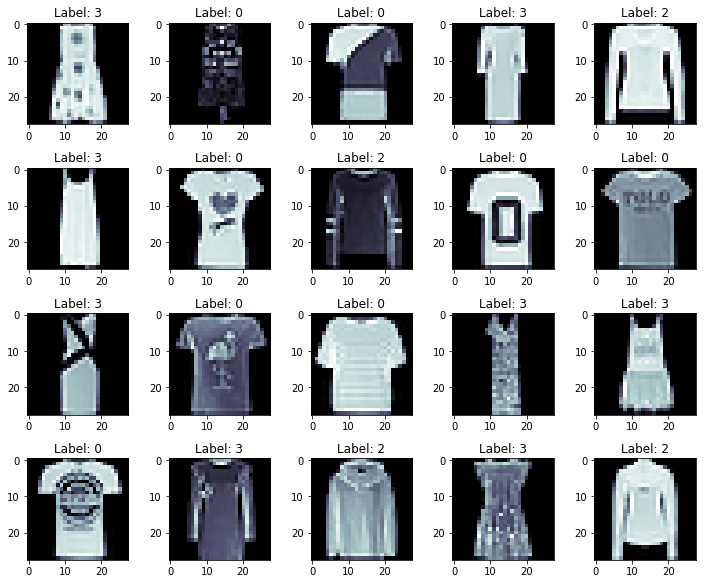

UsageError: Line magic function `%` not found.


In [35]:
import matplotlib.pyplot as plt
#indexing random 20 images for dataset visualisation
indexes=np.random.randint(0,8000,size=(21))
images = plt.figure(figsize=(10, 10))

#Showing first 20 images from the dataset 
for i in range(1,21):
    plt.subplot(5,5, i)
    #using cmap as plt.cm.bone for better visualisation
    plt.imshow(train_images[indexes[i]].reshape(28, 28),cmap=plt.cm.bone)
    plt.title(f'Label: {train_labels[indexes[i]]}') 
#for better visualisation    
images.tight_layout()  
plt.show()
% matplotlib inline



After running the above cell there is no doubt that the assumption that we made regarding the shape of 28 * 28 was correct and also it was quite intuitive considering the basic mnist dataset resemblance of 784 matrix size and 28*28 flattening

After running the above random images multiple times it can be inferred that labels are categories of clothes
with label 0 being for half sleeve tshirts
with label 2 being for full sleeve tshirts
with label 3 being for other category clothes
with label 6 being for shirts

The next step should be data pre processing so Lets go ahead with our inference by reshaping the train_images into 28 *28 and then do the feature scaling for better results

In [10]:
#train_images=train_images.reshape((-1, 28, 28, 1))
#print(type(train_images[0][0][0][0]))

<class 'numpy.int32'>


we can see that the pixel value is int32 and to scale the data we have to convert it into float and then divide by 255

In [54]:
train_images=train_images.astype("float32")/255

Lets do one hot encoding as the target values are multivalues and it makes sense to do one hot encoding here



In [36]:
#from keras.utils import to_categorical
#encoded = to_categorical(train_labels)
#Y=encoded
import pandas as pd
Y=pd.get_dummies(train_labels)

Lets go ahead with splitting the dataset into train and dev set

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_dev, Y_train, Y_dev = train_test_split(train_images,Y, test_size=0.05, random_state=0)
#we are done with train/dev set split
#we are done with data preprocessing 

Applying random forest classifier as Random forests or random decision forests are an ensemble learning method for classification and they give good splits on the features

In [85]:
forest = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=100)
#fitting the model
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
#predicting on dev set
forest_predictions = forest.predict(X_dev)

In [87]:
#printing the accuracy
from sklearn.metrics import (classification_report, accuracy_score,confusion_matrix)  
forest_accuracy = accuracy_score(Y_dev, forest_predictions)
print(f'Accuracy score of Random Forest Classifier: {forest_accuracy}')

Accuracy score of Random Forest Classifier: 0.77


In [88]:
#opening test dataset
path=r'..\CV_problem'
with open(f'{path}\\drive_data\\test_image.pkl', 'rb') as image_fil:    
    test_images = pickle.load(image_fil)

Normalising the data as done in training set

In [90]:
test_images = np.array(test_images)
test_images=test_images.astype("float32")/255

In [91]:
test_images.shape

(2000, 784)

Predicting for testing dataset

In [92]:
y_pred=forest.predict(test_images)

In [93]:
y_pred

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

Now we are done with prediction lets return the original values by undoing one hot encoding and storing the values in a dictionary

In [94]:
#dictionary mapping from indices of output vector to corresponding class labels
prediction_dict = {0: 0, 1: 2, 2: 3, 3: 6}

#array to hold the predicted labels for test set
forest_pred = np.zeros(len(y_pred))

#loop through predicted vectors and adding predicted classes to CNN_predictions 
for i in range(len(y_pred)):
    
    #get index of maximum element in vector
    arg_max = np.argmax(y_pred[i])
    
    #add value of key: arg_max from prediction_dict to CNN_predictions
    forest_pred[i] = prediction_dict[arg_max]

final predicted labe;s for test datapoints

In [110]:
forest_pred

array([0., 0., 0., ..., 6., 6., 6.])

In [106]:
 
output=pd.read_csv(f'{path}\\drive_data\\hitkul(sample_submission).csv')

In [121]:
#printing the head
df = pd.DataFrame({'Test_image_index,': np.arange(len(test_images)), 'predicted class': forest_pred})

In [122]:
#storing in output and then in csv file
df.to_csv(f'{path}\\Anuj_Thareja.csv', index=False)

In [123]:
df = pd.read_csv(f'{path}\\Anuj_Thareja.csv')
df.head()

,"Test_image_index,",predicted class
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


# Below is the model for CNN b

As we are done with pre processing lets apply deep learning algorithm on dev set .
i am planning to apply deep learning algorithm i.e CNN...  

Convolutional Neural Network or CNN is a class of deep neural networks, most commonly applied to analyzing visual imagery
so lets go ahead by applying it

Importing Keras libraries for deep learning

In [ ]:

import keras
from keras.models import Sequential, load_model
from keras.layers import (Conv2D, MaxPooling2D, 
                          Dense, Flatten, 
                          Dropout, BatchNormalization)
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()
#adding convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28,28,1), activation = 'relu'))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu')) 

#adding maxpooling to reduce size of images for training
model.add(MaxPooling2D(pool_size = (2, 2))) 



#adding dropout layer to avoid overfit
model.add(Dropout(0.50)) 

#adding convolutional layer
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu')) 

#adding maxpooling to reduce size of images for training
model.add(MaxPooling2D(pool_size = (2, 2))) 


#adding dropout layer to avoid overfit
model.add(Dropout(0.50)) 


#adding convolutional layer
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu')) 

#adding maxpooling to reduce size of images for training
model.add(MaxPooling2D(pool_size = (2, 2))) 


model.add(Flatten()) 
#adding another layer
model.add(Dense(units = 32, activation = "relu"))

#adding output layer
model.add(Dense(units = 4, activation = "softmax")) 

In [ ]:
#compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

fitting the model

In [ ]:
model.fit(X_train,  Y_train, batch_size = 100,epochs = 1, verbose = 2,validation_data = ( X_dev, Y_dev ))

In [ ]:
predictions = model.predict(X_dev)

In [ ]:
from sklearn.metrics import (classification_report, accuracy_score, 
                             confusion_matrix) 
def plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Parameters-
        y_true: Array of true labels
        y_pred: Array of predicted labels
        labels: List of labels ([0, 2, 3, 6])
    '''
    cm = confusion_matrix(y_true, y_pred)
    
    ax= plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax, fmt = 'g'); #annot=True to annotate cells, fmt='g' to sho

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels[::-1])

In [ ]:
#dictionary mapping from indices of output vector to corresponding class labels
prediction_dict = {0: 0, 1: 2, 2: 3, 3: 6}

#array to hold the predicted labels
CNN_predictions = np.zeros(len(predictions))

#loop through predicted vectors and adding predicted classes to CNN_predictions 
for i in range(len(predictions)):
    
    #get index of maximum element in vector
    arg_max = np.argmax(predictions[i])
    
    #add value of key: arg_max from prediction_dict to CNN_predictions
    CNN_predictions[i] = prediction_dict[arg_max]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import (classification_report, accuracy_score,confusion_matrix) 
labels = [0, 2, 3, 6]
plot_confusion_matrix(Y_dev, CNN_predictions, labels)